#          LOGISTIC REGRESSION ON TITANIC DATASET

## 1. Import Libraries:-
 import some libraries to use :-
 pandas and numpy for data analysis .
 matplotlib and seaborn for data visualization.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Accessing the data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [39]:
train = pd.read_csv('titanic_train.csv')

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploratory Data Analysis:-
Let's visualize the data to get some further insights.

<AxesSubplot:>

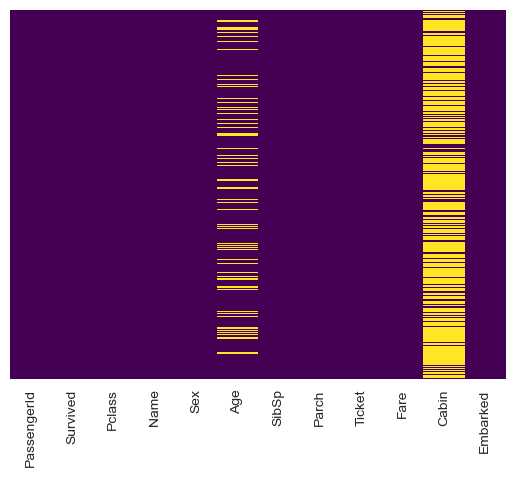

In [42]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We created a simple heatmap to see where we are missing data.
Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level.
Let's continue the visualization to get further insights.

<AxesSubplot:xlabel='Survived', ylabel='count'>

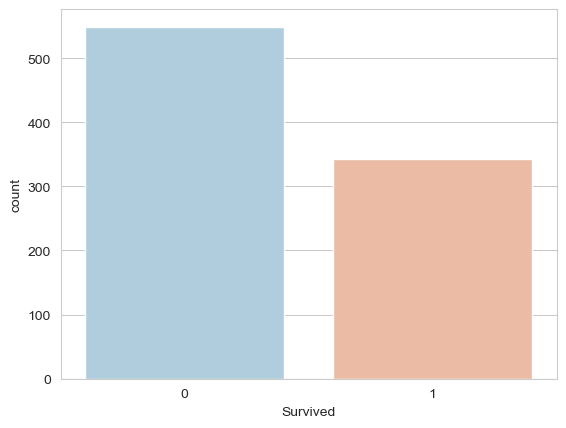

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

we created a countplot. showing that around 550 people died and only 340 survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

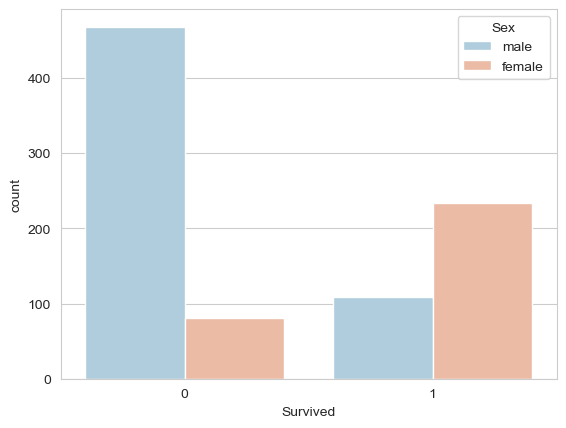

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

we again created a count plot but this time we classified it further on the basis of sex using the hue parameter.
which makes sense that more women survived as compare to men.

<AxesSubplot:xlabel='Survived', ylabel='count'>

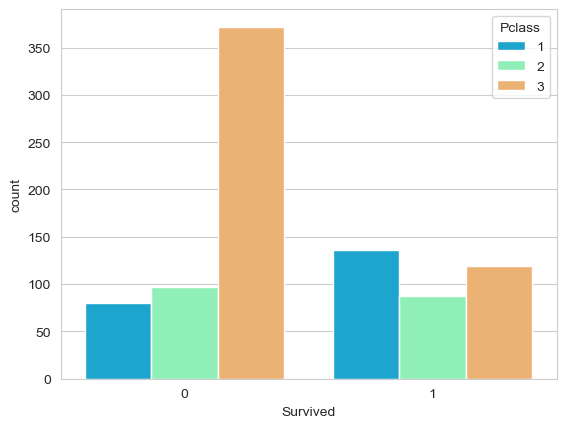

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

we again created a count plot but this time we classified it further on the basis of Pclass using the hue parameter.
which makes sense more people of the higher class survived and more people were in the lower class who weren't able 
to survive.

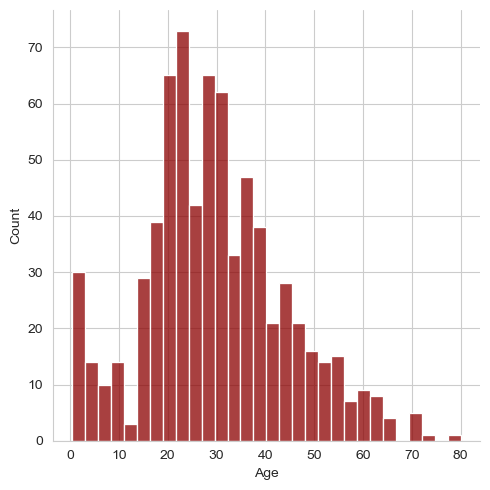

In [9]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

we created a distribution plot of the age of the passengers using seaborn and we also used excluded Kde line 
because it doesn't make any sense using it here.

<AxesSubplot:>

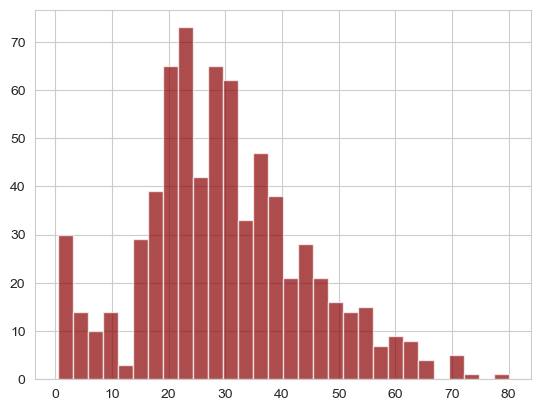

In [10]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

we can create the same distribution plot using inbuilt pyton functions like shown above.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

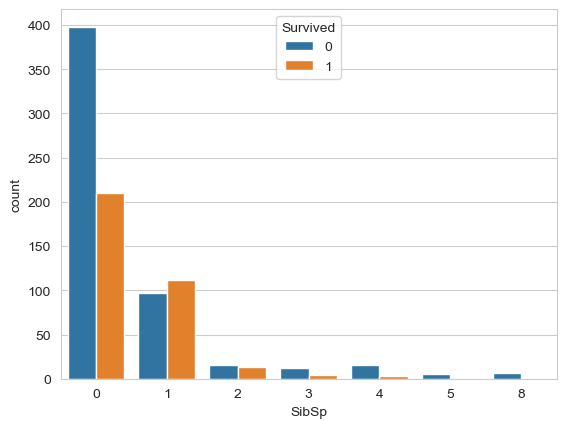

In [46]:
sns.countplot(x='SibSp',data=train,hue='Survived')

we created a count plot to get some idea how many siblings and spouses did people had onboard and how it affected there 
survival chances.

In [13]:
import cufflinks as cf
cf.go_offline()

In [55]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

We created a interactive plot using cufflinks library to get a idea how many people paid how much fair.

## 4.Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. 
we can do it smartly by taking the mean of ages of each Pclass.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

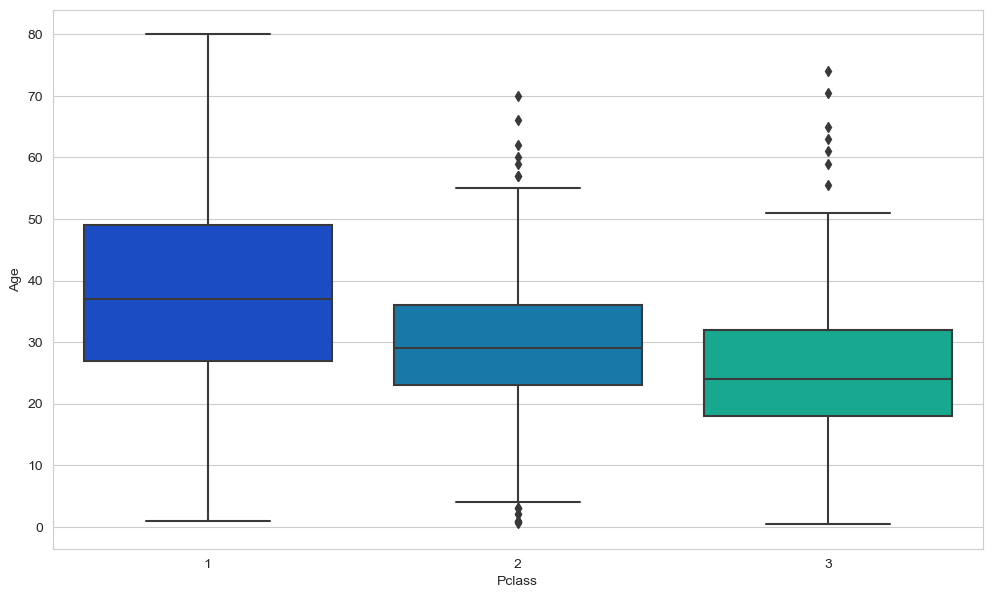

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

from the above boxplot we can see that the line in each box represents it's mean that is :-
Pclass = 1 is 37
Pclass = 2 is 29
Pcalss = 3 is 24

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

We defiened the function imput_age which will traverse through the whole and fill up null values with ages basis 
on which Pclass the person belongs to.

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

We passed the age column and Pclass column through the Impute_age function and assign it again to the age column .

<AxesSubplot:>

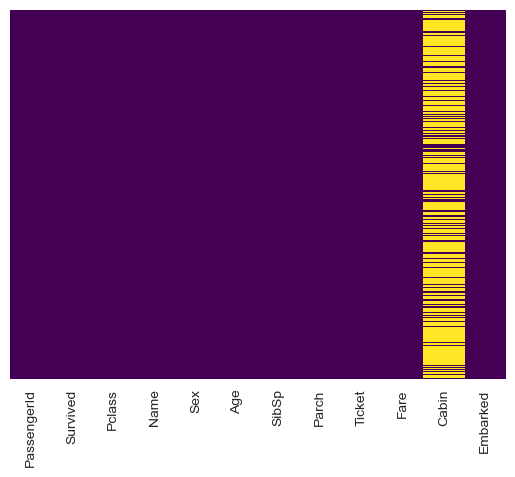

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see the age column is filled completely.

In [19]:
train.drop('Cabin',axis=1,inplace=True)

We droped the cabin column because of too many missing values.

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


That's how our dataframe look now.

In [21]:
train.dropna(inplace=True)

<AxesSubplot:>

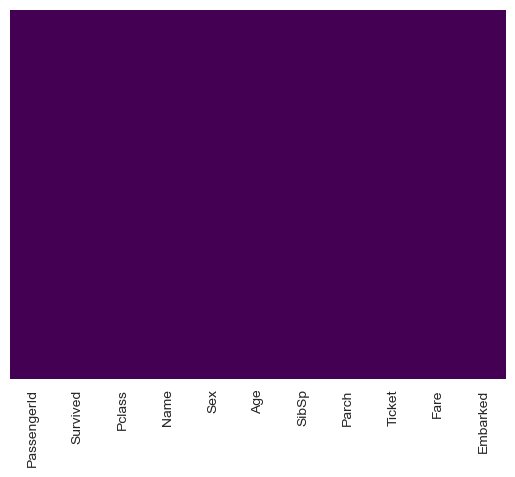

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can all our data is completed and no missing data is left so now we can procide further.

## 5.Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas.Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


we will need to convert the sex and embarked column into dummy variables for the model.

In [24]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

Now we will remove all the object datatype columns from the dataframe.

In [25]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

After removing the object columns we will contatenate the sex and embark column which we created with the dataframe.

In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## 6.Building a Logistic Regression model

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

Let's start by splitting our data into a training set and test set. 30% is test data and 70% is train data.

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

E:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

we created a instance of logistic regression and stored it in the variable logmodel and then fitted the train dataset 
in the logmodel we created.

In [32]:
predictions = logmodel.predict(X_test)

now lets make our logmodel make predictions on the test data and store that in a variable called predictions.

## 7. Evaluation

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.70       104

    accuracy                           0.80       267
   macro avg       0.80      0.76      0.77       267
weighted avg       0.80      0.80      0.79       267



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y_test,predictions))

[[149  14]
 [ 40  64]]


Here is the confusion matrix of our model showing :-
True Positive :- 149
True Negative :- 64
False Positive:-40 (Type 1 error)
False Negative:- 14 (Type 2 error)